# 11 Neural Networks
__Math 3280 - Data Mining__ : Snow College : Dr. Michael E. Olson

* Leskovec, Chapter 13
* Brunton, Chapter 6

### Additional Resources
* [YouTube: Neuroscientifically Challenged - 2-Minute Neuroscience: The Neuron](https://www.youtube.com/watch?v=6qS83wD29PY)
* [YouTube: Mark Rober - Stealing Baseball Signs with a Phone](https://www.youtube.com/watch?v=PmlRbfSavbI)
* [Types of Neural Networks](https://towardsdatascience.com/the-mostly-complete-chart-of-neural-networks-explained-3fb6f2367464)
-----

# Basics of Neural Networks
Neural Networks are based on the functioning of a neuron. A neuron has:
* Dendrites which take in chemicals that explain what is happening
* Nucleus which absorbs and interprets the messages in those chemicals
* Axon which sends chemicals to the next neuron if the signal is strong enough

Similarly, a basic neural network has:
* Input which brings information to a neuron
* Neuron which gives a value based on the information it receives
* Output which sends that information on to the next neuron

One neuron is connected to another through *connections*, similar to the axons of a neuron. This feeds the information from one neuron's calculation to be a part of the next neuron's calculation.

Each neuron's calculation will produce a value between 0 and 1.

## History
* The concept of a neural network was first theorized in 1943
* Technique of the Perceptron was introduced in 1958 by Frank Rosenblatt
  * Belief that ANNs (Artificial Neural Networks) would soon be able to translate languages on the fly
* Due to lack in technology and in data, funding failed and focuses shifted to other methods
  * "AI Winter"
* ImageNet 2012 - Large Scale Visual Recognition Challenge
  * Reintroduced Neural Networks
 
Today, systems are using ANNs everywhere (e.g. Apple and Google for speech and image recognition).


## ANNs Today
The result of these neural networks are quite good.
* [Mona Lisa can talk!](https://www.youtube.com/watch?v=P2uZF-5F1wI)
* [Mark Rober - Stealing Baseball Signs with a Phone](https://www.youtube.com/watch?v=PmlRbfSavbI)

Are Neural Networks perfect yet? No...
* [Neurabites.com](https://neurabites.com/muffin-or-chihuahua/)

## Cautions
* ANNs are relatively easy to train. However, because it's so easy, many people are just using ANNs without understanding what is happening under the hood.

Some of the issues:
* Easy to overfit
  * There are some cases where we want very specific results, but it's very easy to overfit
* Not very good when we want to generalize things
  * Not very good with learning physics (model it to predict where a cannonball lands, but it can't use that to launch a rocket)
* Interpretable/Explainable
  * The number of neurons adds a large number of degrees of freedom which makes it very expressive
  * More degrees of freedom makes it more complicated and harder to interpret
* Incorporating Physics
  * It is a difficult process to incorporate our knowledge of the real world
  * True for all ML Algorithms, but especially for ANNs.

-----
## Perceptrons
In a one-layer neural network, also known as a __perceptron__, only does one calculation. There are two parts:
* An input layer
* An output layer (where the calculation happens)

The value of the perceptron is some function of the input layer. For example,
$$y=x_1 + x_2 + \dots + x_n$$

In [2]:
import numpy as np

x1 = np.array([5,13])
x2 = np.array([4,1])
x1,x2

(array([ 5, 13]), array([4, 1]))

Sometimes, the value is not a direct sum. It is often a weighted sum, and the goal of the perceptron is to find the right weights.
$$y = w_1x_1 + w_2x_2 + \dots + w_nx_n$$

Notice how this is a lot like a linear regression. It is just a version of,
$$AX=Y \qquad \left[a_1,a_2,\dots,a_n\right]\begin{bmatrix}
\vdots & \vdots & & \vdots \\
x_1 & x_2 & \dots & x_n \\
\vdots & \vdots & & \vdots
\end{bmatrix}=\left[y_1,y_2,\dots,y_n\right]$$

So, at this point, this really is just a simple linear algebra problem, which we could solve using the Pseudoinverse:
$$A=YX^\dagger$$

In [3]:
w = ([0.4, 0.9])
sum(w*x1),sum(w*x2)

(13.700000000000001, 2.5)

But what if all $x_i=0$? Then the weights won't do anything and the perceptron becomes dead or useless. So, to prevent a zero value, we have to add in a bias term. This bias term can be positive or negative, and it can be large or small.
$$y = w_1x_1 + w_2x_2 + \dots + w_nx_n + b$$
$$y = \sum_i w_i x_i + b$$

In [4]:
b = -10
sum(w*x1)+b, sum(w*x2)+b

(3.700000000000001, -7.5)

This is the basic idea of the function of a perceptron. The result would be the value, or __activation__, of the output neuron(s).

## Activation Functions
The activation is the value of a particular neuron. The connection that activates a neuron produces a number. Before, we have just dealt with a linear function. Most activation functions are nonlinear.
* *Linear function*
$$y=\sum_i w_ix_i + b$$

However, activation functions are not always linear. Often, we want it to be a number between 0 and 1. There are a few ways to do this:
* *Step function*, also known as the *Threshold Logic Unit (TLU)* or *Linear Threshold Unity (LTU)*
![Step Curve](https://upload.wikimedia.org/wikipedia/commons/thumb/4/4b/Activation_binary_step.svg/120px-Activation_binary_step.svg.png)

In [5]:
z1 = sum(w*x1)+b
z2 = sum(w*x2)+b
max(0, abs(z1)/z1), max(0,abs(z2)/z2)

(1.0, 0)

* *Sigmoid function* (or Logical function)
  * More sensitive to small changes
$$\sigma(z) = \frac{1}{1+e^{-z}} \qquad \sigma(\mathbf{w}\cdot\mathbf{x}+b) = \frac{1}{1+e^{-(\mathbf{w}\cdot\mathbf{x}+b)}}$$
![Sigmoid Curve](https://upload.wikimedia.org/wikipedia/commons/thumb/5/5b/Activation_logistic.svg/120px-Activation_logistic.svg.png)

In [6]:
1/(1+np.exp(-z1)), 1/(1+np.exp(-z2))

(0.9758729785823308, 0.0005527786369235996)

* *Hyperbolic Tangent*
  * This one acts like the Sigmoid function, but goes from -1 to 1
$$\tanh(z)=\frac{e^z - e^{-z}}{e^z + e^{-z}} \qquad \tanh(\mathbf{w}\cdot\mathbf{x}+b)$$
![Hyperbolic Tangent Curve](https://upload.wikimedia.org/wikipedia/commons/thumb/c/cb/Activation_tanh.svg/120px-Activation_tanh.svg.png)

In [7]:
np.tanh(z1), np.tanh(z2)

(0.9987782412811312, -0.9999993881955461)

* *Rectified Linear Unit (ReLU)*
  * $y=\max\{0,\mathbf{w}\cdot\mathbf{x}+b\}$
![ReLU Curve](https://upload.wikimedia.org/wikipedia/commons/thumb/f/fe/Activation_rectified_linear.svg/120px-Activation_rectified_linear.svg.png)

In [8]:
max(0,z1), max(0,z2)

(3.700000000000001, 0)

There are many other activation functions. However, in order to train our network, our activation function needs to be differentiable.

## Hidden Layers
Knowing the basic perceptron, we can Sometimes, we have a second or third step. These extra layers between the input layer and output layer are called __hidden layers__, and a basic neural network with 1 or more hidden layers is a __multi-layer perceptron__, a basic __artificial neural network__.

### Some basic terminology
* The __width of a layer__ is the number of neurons within that layer
* The __depth of a network__ is the number of (*Hidden?*) layers in a network
* An ANN becomes a __Deep Neural Network__ when there are 2 or more hidden layers

## Training an ANN
An ANN most often doesn't get it right the first time. The program has to iterate through the network multiple times to get it right. Each iteration updates the activators (neurons) to improve the result. The activators are updated with new weights in a variety of ways.

The most common way to update weights in an activator is via gradient descent:
$$w_{ij}'=w_{ij} + \eta\left(y_i - \hat{y}_i\right)x_i$$
where
* $w_{ij}$ is the current weight, and $w_{ij}'$ is the updated weight
* $\eta$ is the learning rate
* $x_i$ is the input
* $y_i$ is the target output
* $\hat{y}_i$ is the actual output using the weight of $w_{ij}$

This is the algorithm developed by Rosenblatt, inspired by *Hebb's Rule*, which was published in 1949. 

In [1]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.linear_model import Perceptron

iris = load_iris()
X = iris.data[:, (2,3)] # petal length, petal width
#y = (iris.target == 0).astype(np.int) # Iris setosa
y = iris.target

per_clf = Perceptron()
per_clf.fit(X,y)

y_predict = per_clf.predict([[5,1.5]])

y_predict[0]

2

<AxesSubplot:xlabel='Length', ylabel='Width'>

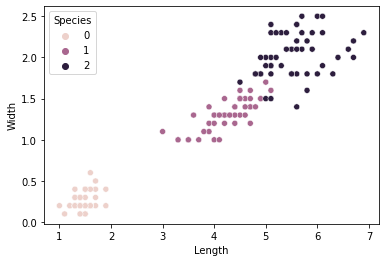

In [10]:
import pandas as pd
import seaborn as sns
import maplotlib.pyplot as plt

X_df = pd.DataFrame(X, columns=['Length','Width'])
X_df['Species'] = pd.DataFrame(y)

f,ax = plt.subplots(1,2)
sns.scatterplot(data=X_df, x='Length', y='Width', hue='Species', ax=ax[0])
sns.scatterplot(data=iris, x='Length', y='Width', hue=y_predict, ax=ax[1])

## Training and Backpropagation
-----
## A simple network (each layer has width=1)
Take a very simple network: 1 neuron ($a^{(L-1)}$) mapped to 1 output ($a^{(L)}=y$).

The output is calculated using the activation function as follows:
$$a^{(L)}=\sigma(z^{(L)}) \qquad z^{(L)} = w^{(L)}a^{(L-1)} + b^{(L)}$$

The __Objective Function__ (aka the __cost function__) measures the error of our output.
$$C=\frac{1}{2}(a^{(L)} - y_0)^2$$
where $y_0$ is the desired output.

Note that the cost function depends on $a^{(L)}$, which depends on $z^{(L)}$, which depends on the weight $w^{(L)}$ and the bias $b^{(L)}$. So, the cost function will change if the weights and biases change. So, we're going to find which weights and biases will minimize the cost function.

When we optimize functions, we generally take the derivative and set it equal to zero. This works well for 1-D or 2-D problems. Once we get into higher dimensions, it becomes far more complicated. In this case, we're going to need to find the derivative of $C$ with respect to each weight and bias, of which we can have 10's of 1000's.

Go back to the simple network. We take the derivative of the cost function with respect to the weight, using the chain rule:
$$\frac{\partial C}{\partial w^{(L)}} = \frac{\partial C_0}{\partial a^{(L)}}\frac{\partial a^{(L)}}{\partial z^{(L)}}\frac{\partial z^{(L)}}{\partial w^{(L)}}$$
$$\begin{align*}
\frac{\partial C}{\partial a^{(L)}} &= a^{(L)}-y_0\\
\frac{\partial a^{(L)}}{\partial z^{(L)}} &= \sigma'(z^{(L)}) \\
\frac{\partial z^{(L)}}{\partial w^{(L)}} &= a^{(L-1)}
\end{align*}$$
$$\frac{\partial C}{\partial w^{(L)}} = a^{(L-1)}(a^{(L)}-y_0)\sigma'(z^{(L)})$$

Note that since we need $\sigma'(z^{(L)})$, then we have to choose an activation function $\sigma(z)$ that is differentiable.

We can do the same for biases:
$$\frac{\partial C}{\partial b^{(L)}} = \frac{\partial C_0}{\partial a^{(L)}}\frac{\partial a^{(L)}}{\partial z^{(L)}}\frac{\partial z^{(L)}}{\partial b^{(L)}} \qquad \frac{\partial z^{(L)}}{\partial b^{(L)}}=1$$
$$\frac{\partial C}{\partial b^{(L)}} = (a^{(L)}-y_0)\sigma'(z^{(L)})$$

#### Updating the weights
Now that we know how much the cost function is affected by the weight and bias. We can add in this error to correct it.
$$w_{k+1}^{(L)} = w_{k}^{(L)} + \frac{\partial C}{\partial w_k^{(L)}} \qquad b_{k+1}^{(L)} = b_{k}^{(L)} + \frac{\partial C}{\partial b_k^{(L)}}$$

However, if we just correct the error right away, then there is a chance that we overfit the data, creating a model that is no good at all. Instead, we going to add in part of the error. We insert our __learning rate__ ($\delta$):
$$w_{k+1}^{(L)} = w_{k}^{(L)} + \delta\frac{\partial C}{\partial w_k^{(L)}} \qquad b_{k+1}^{(L)} = b_{k}^{(L)} + \delta\frac{\partial C}{\partial b_k^{(L)}}$$
This is the process of __Gradient Descent__.

## A more complex network
Now take a network with $i$ neurons in the input layer and $j$ neurons in the output layer. Then,
$$C=\frac{1}{2}\sum_{j=0}^{n_L-1}(a_j^{(L)}-y_j)^2 \qquad a_j^{(L)}=\sigma(z_j^{(L)}) \qquad z_j^{(L)} = \sum_{i=1}^{n_{L-1}-1}w_{ji}^{(L)}a_i^{(L-1)} + b_j^{(L)}$$

Taking the partial derivatives,
$$\frac{\partial C}{\partial w_{ji}^{(L)}} = a_i^{(L-1)}(a_j^{(L)}-y_j)\sigma'(z_j^{(L)}) \qquad \frac{\partial C}{\partial b_{ji}^{(L)}} = (a_j^{(L)}-y_j)\sigma'(z_j^{(L)})$$


We have to do this for every single weight and bias. If we arrange these derivatives into a vector, we get a gradient
$$\nabla C = \begin{bmatrix}
\frac{\partial C}{\partial w_{00}^{(L)}} \\
\frac{\partial C}{\partial w_{01}^{(L)}} \\
\vdots \\
\frac{\partial C}{\partial b_0^{(L)}} \\
\frac{\partial C}{\partial w_{10}^{(L)}} \\
\frac{\partial C}{\partial w_{11}^{(L)}} \\
\frac{\partial C}{\partial b_1^{(L)}} \\
\vdots \\
\frac{\partial C}{\partial w_{ij}^{(L)}} \\
\frac{\partial C}{\partial b_{j}^{(L)}} \\
\vdots
\end{bmatrix}$$

Finally, arrange all our weights and biases into a single vector, then we can update as we did before:
$$W^{(L)}=\begin{bmatrix}
w_{00} \\ w_{01} \\ \dots \\ b_0 \\ w_{10} \\ w_{11} \\ \dots \\ b_1 \\ \dots \\ w_{ij} \\ \dots \\ b_j
\end{bmatrix} \qquad W_{k+1}^{(L)} = W_k^{(L)} + \delta\nabla C$$

## Backpropagation
With the weights and biases updated, we can work backwards and find out what the neuron's values $a_j^{(L-1)}$ should have been to get the right result. Once that is known, we can then use the weights, biases, and value should be for the $a_i^{(L-2)}$ layer.

## Stochastic Gradient Descent
Doing backpropagation has two disadvantages:
1. The amount of data and calculations in the process is very costly on the computer
2. There is a possibility of approaching a local minimum instead of a global minimum

To solve this, we use __stochastic gradient descent__. Instead of using all the data for each backpropogation run, we take just a sample of the data. Then we take another sample of the data for the next backpropagation run, and so on. For instance, if you are working with 1,000 photos of cats or dogs,
* select 40 photos
* run the backpropagation with those 40 photos and update the weights
* select 40 more photos
* run the backpropagation again with those 40 photos
* ...
* stop when the change in weights and biases is small

Using stochastic gradient descent, we do two things:
1. Decrease the computation requirement for this process
2. Each step will "wander" more, which gives us a greater chance of getting to a global minimum

-----
Multi class 

A= [[a11, a12, a13, ...],[a21, a22, a23,...],[a31, a32, a33,...]] 

Mutually exclusive classes: only one solution possible 

Softmax function 
$$\sigma(z)_i = \frac{e^{z_i}}{\sum_{j=1}^k e^{z_j}} for I=1,…,k$$

Non-exclusive classes: can be classified under multiple groups 

Sigmoid function: indicates level reporting each class 

Assign a threshold 

Data assigned a label for any class getting a result above that threshold 

Back Propagation 

Cost function: 
$$C_0(y) = (a^{(L)}− y)2$$
$$a^{(L)} = \sigma(z^{(L)})$$
$$z^{(L)} = w^{(L)}a^{(L−1)} + b^{(L)}$$

a(L)
 is the activation (neuron) for the last layer (output), 
a(L−1)
is the layer before it 

How is the cost affected by the weights? 
$$\frac{\partial C_0}{\partial w^{(L)}} = \frac{\partial C_0}{\partial a^{(L)}}\frac{\partial a^{(L)}}{\partial z^{(L)}}\frac{\partial z^{(L)}}{\partial w^{(L)}}$$

-----
## Artificial Neural Network
#### Problem for this Lecture
We're going to categorize pictures of clothing.

In [1]:
import tensorflow as tf
from tensorflow import keras
print("TF: ",tf.__version__,"   Keras: ",keras.__version__)

2023-12-04 23:22:20.817028: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2023-12-04 23:22:20.937337: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-12-04 23:22:20.937400: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-12-04 23:22:20.941466: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-12-04 23:22:20.964904: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2023-12-04 23:22:20.969485: I tensorflow/core/platform/cpu_feature_guard.cc:1

AttributeError: module 'keras.api._v2.keras' has no attribute '__version__'

In [2]:
# Load the dataset
fashion_mnist = keras.datasets.fashion_mnist
(X, y), (X_test, y_test) = fashion_mnist.load_data()

# There are 60,000 images of size 28x28
X.shape

4422102/4422102 [==============================] - 1s 0us/step


(60000, 28, 28)

In [3]:
# NOTE! Each pixel of the image is represended as a value from 0 to 255. Two problems
  # We want a value from 0 to 1
  # It is an integer, not a float value
# To fix both, divide by 255.0


# We have a test set, but we need a validation set:
X_valid, X_train = X[:5000] / 255.0 , X[5000:] / 255.0
y_valid, y_train = y[:5000], y[5000:]
X_test = X_test / 255.0

In [4]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]
[class_names[y_train[i]] for i in range(20) ]

['Coat',
 'T-shirt/top',
 'Sneaker',
 'Ankle boot',
 'Ankle boot',
 'Ankle boot',
 'Coat',
 'Coat',
 'Dress',
 'Coat',
 'T-shirt/top',
 'Trouser',
 'Bag',
 'Shirt',
 'Dress',
 'Shirt',
 'Coat',
 'Dress',
 'Pullover',
 'Bag']

/tmp/ipykernel_14165/845451874.py:8: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap('gray_r')


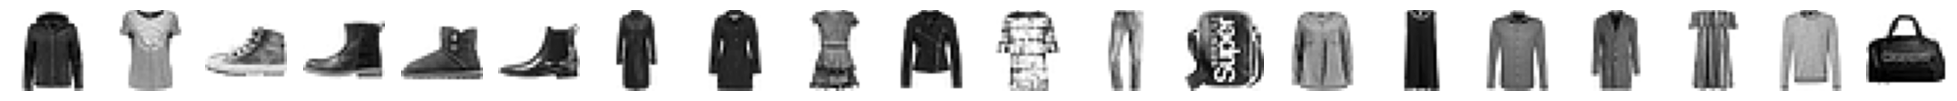

In [5]:
from matplotlib.image import imread
import matplotlib.pyplot as plt

ax = ['ax1','ax2','ax3','ax4','ax5','ax6','ax7','ax8','ax9','ax10','ax11','ax12','ax13','ax14','ax15','ax16','ax17','ax18','ax19','ax20']
f, ax = plt.subplots(1, 20, sharey=True, figsize=(25,6))
for i in range(20):
    img = ax[i].imshow(X_train[i])
    cmap = plt.cm.get_cmap('gray_r')
    img.set_cmap(cmap)
    ax[i].axis('off')

#ax.show()

In [6]:
# model = keras.models.Sequential()                        # Input layer - Single stack of layers
# model.add(keras.layers.Flatten(input_shape=[28,28]))     # Some Preprocessing - converts each input image into a 1D array
# model.add(keras.layers.Dense(300, activation="relu"))    # Hidden layer
# model.add(keras.layers.Dense(100, activation="relu"))    # Hidden layer
# model.add(keras.layers.Dense(10, activation="softmax"))  # Output layer

# Could also write as,
from keras.layers import Dense
model = keras.models.Sequential([                        # Input layer - Single stack of layers
    keras.layers.Flatten(input_shape=[28,28]),           # Some Preprocessing - converts each input image into a 1D array
    Dense(300, activation="relu"),                       # Hidden layer
    Dense(100, activation="relu"),                       # Hidden layer
    Dense(10, activation="softmax")])                    # Output layer

In [7]:
model.summary()
# "Param #" is the number of weights and biases leading into that layer
# The first layer has 784 neurons
# That is 784*300 connections, so 784*300 weights and 300 biases
# total of 235200 + 300 = 235500

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 300)               235500    
                                                                 
 dense_1 (Dense)             (None, 100)               30100     
                                                                 
 dense_2 (Dense)             (None, 10)                1010      
                                                                 
Total params: 266610 (1.02 MB)
Trainable params: 266610 (1.02 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [8]:
# Get a list of the layers
model.layers

In [9]:
# Get values for all weights leading to a layer
weights, biases = model.layers[1].get_weights()
weights

array([[-0.00555782, -0.06274071, -0.0006916 , ..., -0.01639829,
        -0.03046934, -0.01224453],
       [ 0.05431718,  0.0680069 ,  0.04484333, ..., -0.01589354,
        -0.07141361, -0.0326048 ],
       [-0.00016221,  0.03682492, -0.0016818 , ...,  0.05384238,
         0.03716685,  0.04016462],
       ...,
       [ 0.00509766, -0.00884216, -0.03995124, ...,  0.05178173,
         0.04838454, -0.04241992],
       [-0.01834751, -0.03527385,  0.03121734, ..., -0.04951143,
         0.0316957 ,  0.05234788],
       [-0.00614906,  0.00390951,  0.05571733, ..., -0.03062911,
        -0.02791502, -0.03169932]], dtype=float32)

In [10]:
biases

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [11]:
# Compile the model
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",                           # sgd = Stochastic Gradient Descent
              metrics=["accuracy"])

In [12]:
history = model.fit(X_train, y_train, epochs = 10, validation_data=(X_valid, y_valid))

Epoch 1/10


2023-12-04 23:30:46.886695: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 172480000 exceeds 10% of free system memory.


1719/1719 [==============================] - 16s 9ms/step - loss: 0.7083 - accuracy: 0.7705 - val_loss: 0.4954 - val_accuracy: 0.8350
Epoch 2/10
1719/1719 [==============================] - 20s 11ms/step - loss: 0.4845 - accuracy: 0.8325 - val_loss: 0.4607 - val_accuracy: 0.8352
Epoch 3/10
1719/1719 [==============================] - 17s 10ms/step - loss: 0.4405 - accuracy: 0.8463 - val_loss: 0.4093 - val_accuracy: 0.8610
Epoch 4/10
1719/1719 [==============================] - 16s 9ms/step - loss: 0.4143 - accuracy: 0.8555 - val_loss: 0.4043 - val_accuracy: 0.8550
Epoch 5/10
1719/1719 [==============================] - 15s 9ms/step - loss: 0.3936 - accuracy: 0.8623 - val_loss: 0.3904 - val_accuracy: 0.8672
Epoch 6/10
1719/1719 [==============================] - 15s 9ms/step - loss: 0.3792 - accuracy: 0.8671 - val_loss: 0.3728 - val_accuracy: 0.8722
Epoch 7/10
1719/1719 [==============================] - 13s 8ms/step - loss: 0.3664 - accuracy: 0.8714 - val_loss: 0.3707 - val_accuracy: 0

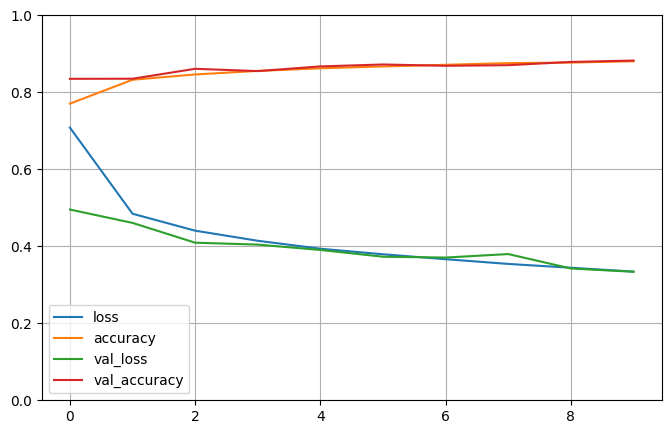

In [13]:
import pandas as pd
import matplotlib.pyplot as plt

pd.DataFrame(history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

In [14]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 2s 7ms/step - loss: 0.3699 - accuracy: 0.8666


[0.3699394762516022, 0.866599977016449]

In [15]:
### Classes:  ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]
X_new = X_test[:3]
y_prob = model.predict(X_new)
y_prob.round(2)

1/1 [==============================] - 0s 258ms/step


array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.05, 0.  , 0.07, 0.01, 0.87],
       [0.  , 0.  , 0.98, 0.  , 0.01, 0.  , 0.01, 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ]],
      dtype=float32)

/tmp/ipykernel_14165/70036968.py:5: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap('gray_r')


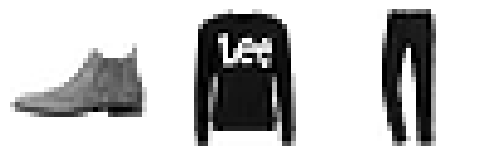

In [16]:
ax = ['ax1','ax2','ax3']
f, ax = plt.subplots(1, 3, sharey=True, figsize=(6,6))
for i in range(3):
    img = ax[i].imshow(X_new[i])
    cmap = plt.cm.get_cmap('gray_r')
    img.set_cmap(cmap)
    ax[i].axis('off')

In [17]:
#y_predict = model.predict_classes(X_new)  # This is the command in the book - not working on Mac
y_predict = model.predict(X_new)
y_predict = y_predict.round(0)
y_predict

1/1 [==============================] - 0s 48ms/step


array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [18]:
# Get values for all weights leading to a layer
weights, biases = model.layers[1].get_weights()
weights

array([[-5.5627930e-03, -6.2740706e-02, -7.0075685e-04, ...,
        -1.6398359e-02, -3.0471072e-02, -1.2218156e-02],
       [ 5.4324213e-02,  6.8006061e-02,  4.4833310e-02, ...,
        -1.5888983e-02, -7.1413524e-02, -3.2581959e-02],
       [-8.9366418e-05,  3.6816325e-02, -1.7310176e-03, ...,
         5.3847685e-02,  3.7159208e-02,  4.0206771e-02],
       ...,
       [ 6.8897749e-03, -8.9304661e-03, -3.5291158e-02, ...,
         5.3304162e-02,  4.7748208e-02, -5.0711405e-02],
       [-1.8522983e-02, -3.5109285e-02,  3.2128438e-02, ...,
        -4.9036391e-02,  3.1723324e-02,  4.9801379e-02],
       [-6.2161977e-03,  3.9089071e-03,  5.6275900e-02, ...,
        -3.0732051e-02, -2.7944820e-02, -3.1848084e-02]], dtype=float32)

In [19]:
biases

array([ 7.89496526e-02,  5.31189726e-04,  8.42384622e-02, -5.62207447e-03,
       -2.81392969e-03,  3.31104472e-02, -2.56857537e-02,  1.23126875e-03,
        1.13984384e-02,  1.17329322e-01,  7.26559162e-02, -4.25417162e-02,
       -4.82092239e-02,  3.20090093e-02,  5.58029208e-03,  1.19240955e-01,
        2.18529012e-02,  5.37247807e-02,  7.61850737e-03,  6.12416938e-02,
        4.03984934e-02,  7.30335899e-03,  6.12969361e-02, -4.54668775e-02,
       -5.65634249e-03,  6.25531822e-02,  1.32381916e-02,  7.53872003e-03,
       -1.38205680e-04,  4.12985357e-03, -6.69400916e-02, -4.72684540e-02,
        6.06886223e-02, -3.44423167e-02,  3.92417759e-02,  2.48630662e-02,
        5.46789654e-02, -6.48020208e-03,  8.73772055e-02,  4.09235321e-02,
       -5.25628310e-03,  3.04538844e-04,  2.44038198e-02, -3.01556051e-04,
        2.70610936e-02,  1.24043915e-02,  1.10939249e-01,  1.33933261e-01,
        2.56751888e-02, -2.08688481e-03,  7.29098096e-02, -1.71435159e-02,
        8.06278139e-02,  

## Functional APIs
We saw earlier that a __deep layer__ is one with two or more hidden layers. A __wide and deep network__  is one that has hidden layers, but some of the data bypasses the hidden layers.

For example, we could have two datasets. The first is held until later, but the second runs through the deep network. Then later, they are concatenated for the rest of the calculations.

<img src="https://learning.oreilly.com/api/v2/epubs/urn:orm:book:9781492032632/files/assets/mls2_1015.png" width=250>

In [30]:
# Create two inputs
input_A = keras.layers.Input(shape=[5], name="wide_input")
input_B = keras.layers.Input(shape=[6], name="deep_input")

# Create hidden layers, using input_B as input
hidden1 = keras.layers.Dense(30, activation="relu")(input_B)
hidden2 = keras.layers.Dense(30, activation="relu")(hidden1)

# Merge input_A with the deep network from input_B
concat = keras.layers.concatenate([input_A, hidden2])

# Output
output = keras.layers.Dense(1, name="output")(concat)

model = keras.Model(inputs=[input_A, input_B], outputs=[output])

Notice that each layer acts as a function with a parameter fed into it. This is why this is commonly called the __Functional API__.

We could also merge an input layer with itself after it's passed through the deep network.

<img src="https://learning.oreilly.com/api/v2/epubs/urn:orm:book:9781492032632/files/assets/mls2_1014.png" width=250>

In [31]:
# Create two inputs
input_A = keras.layers.Input(shape=X_train.shape[1:])

# Create hidden layers
hidden1 = keras.layers.Dense(30, activation="relu")(input_A)
hidden2 = keras.layers.Dense(30, activation="relu")(hidden1)

# Merge input_A with the deep network
concat = keras.layers.concatenate([input_A, hidden2])

# Output
output = keras.layers.Dense(1)(concat)

model = keras.Model(inputs=[input_A, input_B], outputs=[output])
model.compile(loss='mse', optimizer='sgd')

In some cases, you may also want multiple outputs:

<img src="https://learning.oreilly.com/api/v2/epubs/urn:orm:book:9781492032632/files/assets/mls2_1016.png" width=250>

In [32]:
# Create two inputs
input_A = keras.layers.Input(shape=[5], name="wide_input")
input_B = keras.layers.Input(shape=[6], name="deep_input")

# Create hidden layers, using input_B as input
hidden1 = keras.layers.Dense(30, activation="relu")(input_B)
hidden2 = keras.layers.Dense(30, activation="relu")(hidden1)

# Merge input_A with the deep network from input_B
concat = keras.layers.concatenate([input_A, hidden2])

# Output
output = keras.layers.Dense(1, name="main_output")(concat)
output_aux = keras.layers.Dense(1, name="aux_output")(hidden2)

model = keras.Model(inputs=[input_A, input_B], outputs=[output, output_aux])
model.compile(loss=['mse', 'mse'], loss_weights=[0.9, 0.1], optimizer='sgd')

-----
## Choosing the right Hyperparameters
How many layers should I use? How big should each layer be? What arrangement of activation functions and optimizers should I use?

There are an infinite number of answers to these questions. So, fine-tuning can be difficult. We can use a `RandomizedSearchCV` or `GridSearchCV` to quickly set up multiple networks and find the best one. Here's what it would look like using `RandomizedSearchCV`:

In [33]:
# Create a function to build and compile the network
def build_model(n_hidden=1, n_neurons=30, learning_rate=3e-3, input_shape=[8]):
    model = keras.models.Sequential()
    model.add(keras.layers.InputLayer(input_shape=input_shape))
    for layer in range(n_hidden):
        model.add(keras.layers.Dense(n_neurons, activation="relu"))
    model.add(keras.layers.Dense(1))
    optimizer = keras.optimizers.SGD(lr=learning_rate)
    model.compile(loss="mse", optimizer=optimizer)
    return model

# Create a wrapper around Keras using the function we just created
keras_reg = keras.wrappers.scikit_learn.KerasRegressor(build_model)

# Use this wrapper like a regular Scikit-Learn Regressor
#   Train using `fit()`
#   Make predictions using `predict()`
keras_reg.fit(X_train, y_train, epochs=100,
              validation_data=(X_valid, y_valid),
              callbacks=[keras.callbacks.EarlyStopping(patience=10)])
mse_test = keras_reg.score(X_test, y_test)
y_pred = keras_reg.predict(X_new)

# Finally, set up the commands to run multiple models
from scipy.stats import reciprocal
from sklearn.model_selection import RandomizedSearchCV

param_distribs = {
    "n_hidden": [0, 1, 2, 3],
    "n_neurons": np.arange(1, 100),
    "learning_rate": reciprocal(3e-4, 3e-2),
}

rnd_search_cv = RandomizedSearchCV(keras_reg, param_distribs, n_iter=10, cv=3)
rnd_search_cv.fit(X_train, y_train, epochs=100,
                  validation_data=(X_valid, y_valid),
                  callbacks=[keras.callbacks.EarlyStopping(patience=10)])

/var/folders/qk/b_fqr8c925l80p4m9dkk0wth0000gn/T/ipykernel_28442/1391298444.py:13: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  keras_reg = keras.wrappers.scikit_learn.KerasRegressor(build_model)
/Users/michaelolson/.virtualenvs/NeuralNets/lib/python3.9/site-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


Epoch 1/100


ValueError: in user code:

    File "/Users/michaelolson/.virtualenvs/NeuralNets/lib/python3.9/site-packages/keras/engine/training.py", line 1021, in train_function  *
        return step_function(self, iterator)
    File "/Users/michaelolson/.virtualenvs/NeuralNets/lib/python3.9/site-packages/keras/engine/training.py", line 1010, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/Users/michaelolson/.virtualenvs/NeuralNets/lib/python3.9/site-packages/keras/engine/training.py", line 1000, in run_step  **
        outputs = model.train_step(data)
    File "/Users/michaelolson/.virtualenvs/NeuralNets/lib/python3.9/site-packages/keras/engine/training.py", line 859, in train_step
        y_pred = self(x, training=True)
    File "/Users/michaelolson/.virtualenvs/NeuralNets/lib/python3.9/site-packages/keras/utils/traceback_utils.py", line 67, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "/Users/michaelolson/.virtualenvs/NeuralNets/lib/python3.9/site-packages/keras/engine/input_spec.py", line 264, in assert_input_compatibility
        raise ValueError(f'Input {input_index} of layer "{layer_name}" is '

    ValueError: Input 0 of layer "sequential_1" is incompatible with the layer: expected shape=(None, 8), found shape=(None, 28, 28)


-----
## Vanishing/Exploding Gradients + Solutions
Using the Sigmoid Function, results can get really close to 0 or to 1. These gradients could die away if the results are too close to either, which stops neurons from updating. These are known as __vanishing gradients__. There are some cases where gradients can keep increasing throughout the backpropagation process instead of decreasing. These are __exploding gradients__.

Two solutions are to select the appropriate method for initializing weights and biases and to select a __nonsaturating activation function__.

*Initializing functions*

The __Glorot initialization__ initializes the weights and biases using either of these two options:
1. A normal distribution with mean 0 and variance $\sigma^2 = \frac{1}{fan_{avg}}$
2. A uniform distribution between $-r$ and $+r$ with $r=\sqrt{\frac{3}{fan_{avg}}}$

* $fan_{in}$: number of inputs
* $fan_{out}$: number of neurons
* $fan_{avg} = \frac{fan_{in} + fan_{out}}2$

The __LeCun initialization__ uses the same method, using $fan_{in}$ instead of $fan_{avg}$. These initializing functions were first proposed in the 1990s, but took until the 2000s to realize how helpful they are. These initializations cut processing time significantly, and are one contribution to the success of Neural Networks in the 2010s.

When creating a layer, the default is the `glorot_uniform` initializer. You can change the initializer as,

In [ ]:
import tensorflow as tf
from tensorflow import keras

In [ ]:
keras.layers.Dense(10, kernel_initializer="lecun_normal")
keras.layers.Dense(10, kernel_initializer="he_normal")
keras.layers.Dense(10, kernel_initializer="he_uniform")

*Nonsaturating Activation Functions*
Activation functions can cause problems as well. For example, the ReLU activation function causes the neuron to die if the weight function is continually negative. To solve this, we define new activation functions based on the ReLU:

* Leaky ReLU
$$\sigma(z) = \max(\alpha z, z)$$
<img src="https://learning.oreilly.com/api/v2/epubs/urn:orm:book:9781492032632/files/assets/mls2_1102.png" width=250>

* ELU (Exponential Linear Unit)
$$\sigma(z) = \begin{cases}
  \alpha(e^z -1) & \text{if } z<0 \\
  z              & \text{if } z>=0
\end{cases}$$
<img src="https://learning.oreilly.com/api/v2/epubs/urn:orm:book:9781492032632/files/assets/mls2_1103.png" width=250>

* SELU (Scaled ELU)
  * Self-Normalizes if:
    * network is composed of exclusively dense layers, and 
    * all layers use the SELU activation function
  * Will not self-normalize if using nonsequential architectures, such as Recurrent Networks and Wide and Deep Networks
  * Input features must be standardized ($\mu=0, \sigma=1$) 

* PReLU (Parametric Leaky ReLU)
* RReLU (Randomized Leaky ReLU)

Each initialization works with particular activation functions:
| Initialization | Activation functions | $\sigma^2$ (Normal) |
| :--- | :---: | :---: |
| Glorot | None, tanh, logistic, softmax | $1 / fan_{avg}$ |
| He | ReLU and variants | $2 / fan_{in}$ |
| LeCun | SELU | $1 / fan_{in}$ |

To use LeakyReLU, just create a Dense layer using the right initializer, followed by a LeakyReLU layer:

In [ ]:
model = keras.models.Sequential()
model.add(keras.layers.Dense(10, kernel_initializer="he_normal"))
model.add(keras.layers.LeakyReLU(alpha=0.2))

Other initializations and nonsaturating activation functions can be called in the same line:

In [ ]:
model.add(keras.layers.Dense(10, activation="selu", kernel_initializer="lecun_normal"))

### Batch Normalization
The new initializations and the nonsaturating activation functions do significantly help, but there is still a risk that vanishing/exploding gradients come up in the middle of training. To prevent them from returning, we use __Batch Normalization__, which takes the mean and standard deviation of each input from a batch, and standardizes it:
$$\mathbf{\mu}_B = \frac 1{m_B}\sum_{i=1}^{m_B} \mathbf{x}^{(i)} \qquad\qquad \mathbf{\sigma}_B^2 = \frac 1{m_B}\sum_{i=1}^{m_B}\left(\mathbf{x}^{(i)} - \mathbf{\mu}_B\right)^2 \qquad\qquad \hat{\mathbf{x}}^{(i)} = \frac{\mathbf{x}^{(i)} - \mathbf{\mu}_B}{\sqrt{\mathbf{\sigma}_B^2 + \epsilon}} \qquad\qquad \mathbf{z}^{(i)} = \mathbf{\gamma}\otimes \hat{\mathbf{x}}^{(i)} + \mathbf{\beta}$$

* $\mathbf{\mu}_B$: Vector of input means from the batch
* $\mathbf{\sigma}_B$: Vector of input standard deviations from the batch
* $m_B$: number of instances in mini-batch
* $\mathbf{x}^{(i)}$: vector of inputs for instance $i$
* $\hat{\mathbf{x}}^{(i)}$: vector of zero-centered and normalized inputs for instance $i$
* ...other variables described in text

In [ ]:
model.add(keras.layers.Dense(10, activation="softmax"))


### Other methods for vanishing/exploding gradients
* Gradient clipping

-----
## Reusing Pretrained Layers / Transfer Learning
We can save trained networks to use later. We can either use the full network or, if the question B is similar to model A, then we can use parts of model A to create a new DNN for question B.

In [ ]:
##  Step 1:  Load model A
model_A = keras.models.load_model("model_A.h5")

##  Step 2:  Add desired layer(s) to model B
model_B = keras.models.Sequential(model_A.layers[:-1])      # Add layers from A to B
model_B.add(keras.layers.Dense(1, activation="sigmoid"))    # New Output Layer

##  Step 3:  (Optional) Clone model A
    ##  If you use layers from A directly in B, then training B may retrain layers in A
    ##  Normally, this isn't a problem
    ##  If you want to reuse layers from A later, then we need a fresh copy of those layers
##  Copy both the model and the weights
model_A_clone = keras.models.clone_model(model_A)
model_A_clone.set_weights(model_A.get_weights())

##  Step 4:  Freeze layers you don't want changed
for layer in model_B.layers[:-1]:
    layer.trainable = False         # Freezes the layer
    #layer.trainable = True         # Unfreezes the layer

##  Step 5:  Recompile and run
    ##  Be sure to compile the model every time to freeze or unfreeze layers
model_B.compile(loss="binary_crossentropy", optimizer="sgd", metrics=["accuracy"])

history = model_B.fit(X_train_B, y_train_B, epochs=4, validation_data=(X_valid_B, y_valid_B))

for layer in model_B.layers[:-1]:
    layer.trainable = True

optimizer = keras.optimizers.SGD(lr=1e-4) # the default lr is 1e-2
model_B.compile(loss="binary_crossentropy", optimizer=optimizer, metrics=["accuracy"])
history = model_B.fit(X_train_B, y_train_B, epochs=16, validation_data=(X_valid_B, y_valid_B))

##  Step 6:  Evaluate
model_B.evaluate(X_test_B, y_test_B)

-----
## Unsupervised Pretraining
What if you don't have enough labelled data? 
* Use unlabelled data to train hidden layers
* Use labelled data to train output layers

This technique, when revealed in 2006, is what led to the revival of neural networks and the success of Deep Learning. At first, people used the *greedy layer-wise pretraining* technique due to the difficulty of training deep models.
* Train a layer (typically Restricted Boltzmann Machines (RBMs))
* Freeze it
* Add another layer on top of that and train it
* Freeze the new layer
* ... continue until you have trained all your layers ...
* Add an output layer, and use your labelled data to train it

<img src="https://learning.oreilly.com/api/v2/epubs/urn:orm:book:9781492032632/files/assets/mls2_1105.png" width=50%>

-----
## Faster optimizers
How have we sped up our training?
1. Apply a good initialization strategy for the connection weights
2. Use a nonsaturating activation function to prevent vanishing/exploding gradients
3. Use Batch Normalization
4. Reuse parts of a pretrained network

We can also use different optimizers. So far, we have only used the *Stochastic Gradient Descent* (SGD). This takes small, consistent steps toward the solution. But what if we vary the step size?

### Stochastic Gradient Descent (SGD)
The weights $\theta$ are decreased by a gradient of the cost function $J(\theta)$ at some learning rate:
$$\theta \leftarrow \theta - \eta\nabla_\theta J(\theta)$$

where $\eta$ is a learning rate.

### Momentum Optimization
Slow start, but quickly speeds up to some terminal velocity. We do this by introducing a __momentum vector__:
$$\mathbf{m} \leftarrow \beta\mathbf{m} - \eta\nabla_\theta J(\theta) \qquad\qquad \theta \leftarrow \theta + \mathbf{m}$$

where $\beta$ is a hyperparameter to limit how high $\mathbf{m}$ can be, and has a value between 0 (high friction) and 1 (no friction). $\beta=0.9$ is a typical value.

The terminal velocity would be,
$$\frac{\eta\nabla_\theta J(\theta)}{1-\beta}$$

If $\beta=0.9$, then the terminal velocity is 10 times the gradient times the learning rate. That means this can be 10 times faster than SGD.

In [ ]:
optimizer = keras.optimizers.SGD(lr=0.001, momentum=0.9)

### Nesterov Accelerated Gradient (NAG)
A variant of the momentum optimization, which is almost always faster. In the NAG method, we measure the gradient of the cost function slightly ahead in the direction of the momentum.
$$\mathbf{m} \leftarrow \beta\mathbf{m} - \eta\nabla_\theta J(\theta + \beta\mathbf{m}) \qquad\qquad \theta \leftarrow \theta + \mathbf{m}$$

<img src="https://learning.oreilly.com/api/v2/epubs/urn:orm:book:9781492032632/files/assets/mls2_1106.png" width=50%>

In [ ]:
optimizer = keras.optimizers.SGD(lr=0.001, momentum=0.9, nesterov=True)

### AdaGrad
The Gradient Descent always points down the steepest slope. However, this doesn't always point to the center. The AdaGrad algorithm scales down the gradient vector along the steepest dimensions
$$\mathbf{s} \leftarrow \mathbf{s} + \nabla_\theta J(\theta) \otimes \nabla_\theta J(\theta) \qquad \qquad \theta\leftarrow\theta - \eta\nabla_\theta J(\theta)\oslash \sqrt{\mathbf{s}+\epsilon}$$

Notation:
* $\otimes$ is element-wise multiplication
* $\oslash$ is element-wise division
* $\mathbf{s}$ is the square of the gradients
* $\epsilon$ is a smoothing term to avoid division by zero

<img src="https://learning.oreilly.com/api/v2/epubs/urn:orm:book:9781492032632/files/assets/mls2_1107.png" width=50%>

This optimizer works well for simple quadratic problems, but can sometimes stop too early in training. This may not be a good option for DNNs.

### RMSProp
RMSProp resolves the issues in AdaGrad by using an exponential decay in the first step:
$$\mathbf{s} \leftarrow \beta \mathbf{s} + (1-\beta)\nabla_\theta J(\theta) \otimes \nabla_\theta J(\theta) \qquad \qquad \theta\leftarrow\theta - \eta\nabla_\theta J(\theta)\oslash \sqrt{\mathbf{s}+\epsilon}$$

In [ ]:
optimizer = keras.optimizers.RMSprop(lr=0.001, rho=0.9)